In [1]:
% matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

from data_loading import load_mnist

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
X_train, y_train, X_test, y_test = load_mnist()

In [4]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [5]:
net = MLPNet().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [6]:
n_steps = 1000
batch = 100
for i in range(n_steps):
    optimizer.zero_grad()
    indices = np.random.choice(len(y_train), batch)
    X, y = X_train[indices].to(device), y_train[indices].to(device)
    output = net(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

In [7]:
y_pred = net(X_test.to(device)).softmax(dim=1).to('cpu').detach()
one_hot = np.zeros(y_test.shape + (10,))
one_hot[np.arange(len(y_test)), y_test] = 1

In [8]:
roc_auc_score(one_hot, y_pred)

0.99808836144512758

pred=7, true=7


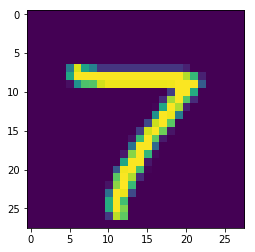

In [9]:
index = np.random.choice(len(y_test))
x, y = X_test[index], y_test[index]
out = net(x.to(device)).detach().to('cpu')
print(f"pred={np.argmax(out).item()}, true={y}")
plt.imshow(x)